In [11]:
import pandas as pd 
from glob import glob

stations_files = glob('/python_Pjt/DataScience-master/data/지역*.xls')
# stations_files

tmp_raw =[]

for file_name in stations_files:
    tmp =  pd.read_excel(file_name, header=2)
    tmp_raw.append(tmp)

station_raw = pd.concat(tmp_raw)
# station_raw.info()

stations = pd.DataFrame({'Oil_store':station_raw['상호'],'주소':station_raw['주소'],'가격':station_raw['휘발유'],'셀프':station_raw['셀프여부'],'상표':station_raw['상표']})
                                                                                                         
# stations.head()

stations['구'] = [eachAddress.split()[1] for eachAddress in stations['주소']]
# stations.head()

stations['구'].unique()

stations[stations['구']=='서울특별시']
stations.loc[stations['구']=='서울특별시','구'] = '성동구'
stations['구'].unique()
stations[stations['구']=='특별시']

stations.loc[stations['구']=='특별시', '구'] = '도봉구'
stations['구'].unique()

stations =  stations[stations['가격'] !='-']
# stations.head()

stations['가격'] = [float(value) for value in stations['가격']]
stations.reset_index(inplace= True)
del stations['index']



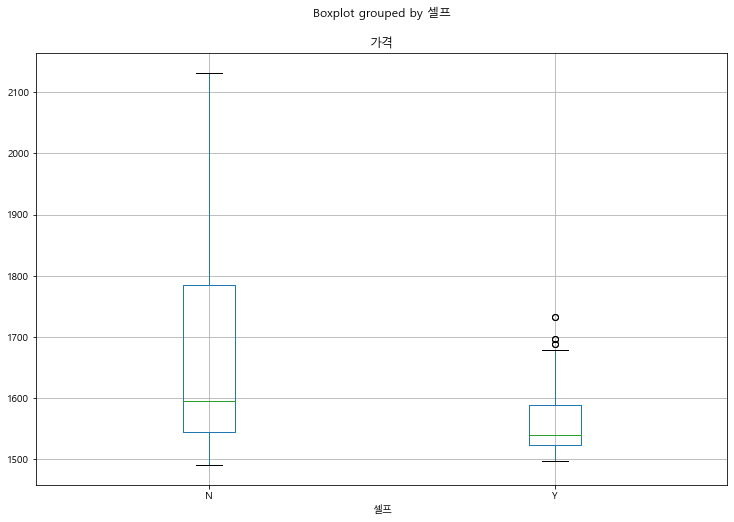

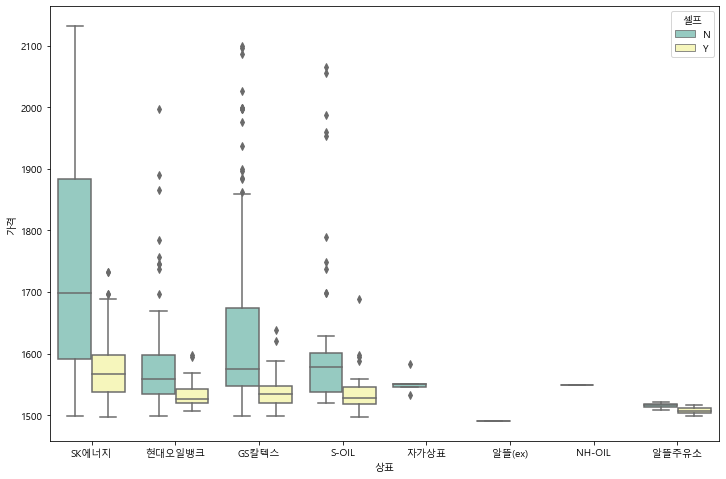

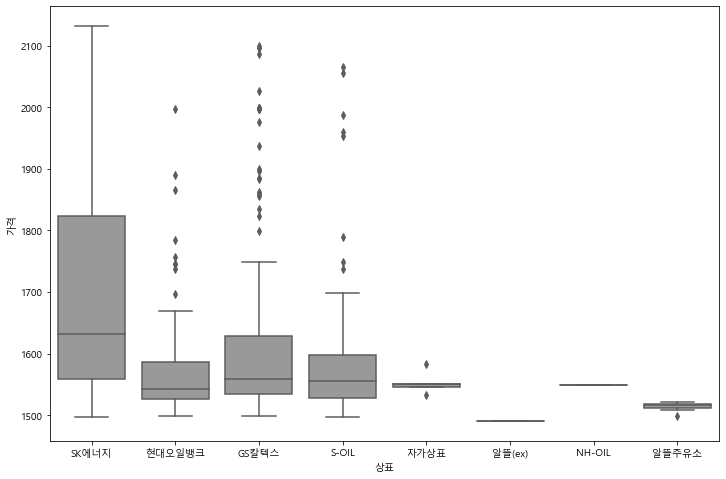

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

################################################################
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
################################################################

stations.boxplot(column ='가격', by='셀프', figsize=(12,8));

plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette="Set3")
# plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x="상표", y="가격", data =stations, color=".6")
# plt.show()




In [12]:
#192~198

import json 
import folium
import googlemaps
import warnings
warnings.simplefilter(action = "ignore", category= FutureWarning)
stations.sort_values(by='가격', ascending=False).head(10)
import numpy as np 
import pandas as pd 

gu_data = pd.pivot_table(stations,index=["구"], values=["가격"], aggfunc=np.mean)
gu_data.head()

geo_path = '/python_Pjt/DataScience-master/data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502,123.982], zoom_start=10.5, titles='Stamen Toner')

map.choropleth(geo_str = geo_str, data= gu_data, columns=[gu_data.index, '가격'], fill_color='PuRd', key_on='feature.id')
map

TypeError: __init__() missing 1 required positional argument: 'geo_data'